In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
path = os.getcwd()

if path[1:5] == "Home":
    %run /Home/siv30/wad005/master/GRB/src/paths/uib.ipynb
else:
    %run /Users/andreas/phys/master/GRB/src/paths/mac.ipynb


All MAC paths are set!


In [ ]:
#TODO: check rsp for 2,3,7 => 181222, 190206, 190305
#what were the rsp used?
#181222: theta,phi = 105.00, -45 => 


In [2]:
HED_DRM = pd.read_csv(drm_path+fn, sep=' ',header=None).T.to_numpy(dtype=np.float32)

NameError: name 'fn' is not defined

In [ ]:
filenames = os.listdir(drm_path)
filenames.remove('.DS_Store')

phi_angles, theta_angles = [],[]
for fn in filenames:
    theta,phi = fn.split("_")[-2], fn.split("_")[-1][:-4]
    theta_angles.append(theta)
    phi_angles.append(phi)

phi_angles, theta_angles, sort_index = np.asanyarray(phi_angles), np.asanyarray(theta_angles), np.argsort(phi_angles)
phi_angles, theta_angles = phi_angles[sort_index], theta_angles[sort_index]

for t in zip(theta_angles,phi_angles):
    print(f'{t[0]}, {t[1]}')

In [5]:
%matplotlib inline

In [21]:
en = np.array([0.0100,0.0126,0.0158,0.0200  ,0.0251  ,0.0316  ,0.0398  ,0.0501  ,0.0631,  0.0794,  0.1000  ,0.1259  ,0.1585  ,0.1995  ,0.2512  ,0.3162  ,0.3981  ,0.5012  ,0.6310  ,0.7943  ,1.0000,  1.2589,  1.5849,  1.9953,  2.5119,  3.1623,  3.9811,  5.0119  ,6.3096,  7.9433,  10.0000,  12.5893,  15.8489,  19.9526, 25.1189, 31.6228 ,39.8107 ,50.1187 ,63.0957 ,79.4328 ,100.0000],dtype=np.float16)
print(f'{round(en[17]*1e3,1)} keV')
print(f'{en[20]} MeV')

501.0 keV
1.0 MeV


['HED_drm_mats_90.00_-180.00.txt', 'HED_drm_mats_90.00_-165.00.txt', 'HED_drm_mats_90.00_-150.00.txt', 'HED_drm_mats_90.00_-135.00.txt', 'HED_drm_mats_90.00_-120.00.txt', 'HED_drm_mats_90.00_-105.00.txt', 'HED_drm_mats_90.00_-90.00.txt', 'HED_drm_mats_90.00_-75.00.txt', 'HED_drm_mats_90.00_-60.00.txt', 'HED_drm_mats_90.00_-45.00.txt', 'HED_drm_mats_90.00_-30.00.txt', 'HED_drm_mats_90.00_-15.00.txt', 'HED_drm_mats_90.00_0.00.txt', 'HED_drm_mats_90.00_15.00.txt', 'HED_drm_mats_90.00_30.00.txt', 'HED_drm_mats_90.00_45.00.txt', 'HED_drm_mats_90.00_60.00.txt', 'HED_drm_mats_90.00_75.00.txt', 'HED_drm_mats_90.00_90.00.txt', 'HED_drm_mats_90.00_105.00.txt', 'HED_drm_mats_90.00_120.00.txt', 'HED_drm_mats_90.00_135.00.txt', 'HED_drm_mats_90.00_150.00.txt', 'HED_drm_mats_90.00_165.00.txt', 'HED_drm_mats_90.00_180.00.txt']


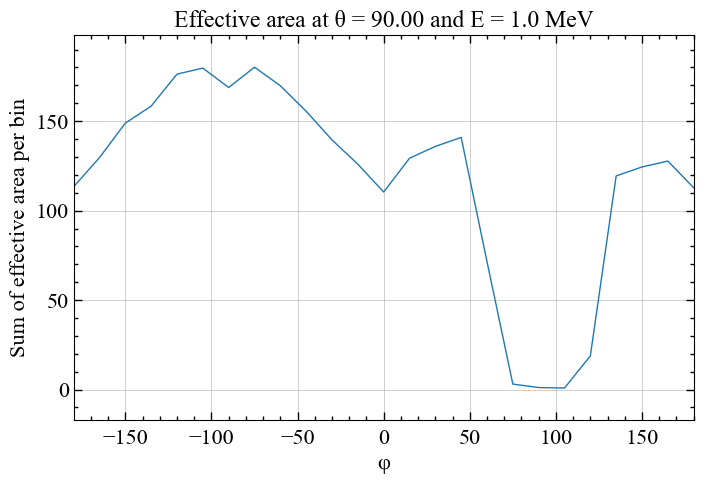

In [28]:
eff_area = []
crit_theta_angle = '90.00'
filenames = [fn for fn in os.listdir(drm_path) if crit_theta_angle in fn.split("_")[-2]]
i = 20 #1 MeV
def sort_filenames(fn):
    phi_angle = fn.split("_")[-1][:-4]
    if phi_angle == '-180.00':
        return -180.00
    elif phi_angle == '180.00':
        return 180.00
    else:
        return float(phi_angle)
    
filenames.sort(key=sort_filenames)
print(filenames)

phi_angles = []
for fn in filenames:
    phi_angle = fn.split("_")[-1][:-4]
    phi_angles.append(float(phi_angle))

for fn in filenames:
    HED_DRM = pd.read_csv(os.path.join(drm_path, fn), sep=' ', header=None).T.to_numpy(dtype=np.float32)
    eff_area.append(sum(HED_DRM[i,:]))
    #find out how the DRM is structured. Effective area is the sum of the 20 bin (1 MeV), over all other bins
    
eff_area = np.array(eff_area, dtype=np.float16)

plt.plot(phi_angles, eff_area)
plt.xlabel(f'{chr(966)}')
plt.ylabel('Sum of effective area per bin')
plt.title(f'Effective area at {chr(952)} = {crit_theta_angle} and E = {round(en[i],1)} MeV')
plt.grid()
plt.show()


In [27]:
eff_area

array([1.714e+02, 1.830e+02, 2.002e+02, 2.231e+02, 2.435e+02, 2.590e+02,
       2.630e+02, 2.610e+02, 2.426e+02, 2.188e+02, 2.015e+02, 1.838e+02,
       1.685e+02, 1.822e+02, 1.902e+02, 1.799e+02, 1.895e+01, 1.741e-01,
       8.356e+01, 3.334e+00, 2.988e+00, 7.931e+01, 1.728e+02, 1.838e+02,
       1.739e+02], dtype=float16)

In [54]:
diff = np.diff(eff_area,prepend=True)
for t in zip(diff,phi_angles):
    print(t)

(277.8, -180.0)
(14.0, -165.0)
(9.75, -150.0)
(15.25, -135.0)
(18.25, -120.0)
(9.75, -105.0)
(1.5, -90.0)
(-4.25, -75.0)
(-9.5, -60.0)
(-17.5, -45.0)
(-15.0, -30.0)
(-11.25, -15.0)
(-8.5, 0.0)
(16.75, 15.0)
(7.5, 30.0)
(-37.5, 45.0)
(-243.2, 60.0)
(-16.0, 75.0)
(-1.195, 90.0)
(13.39, 105.0)
(-15.11, 120.0)
(90.94, 135.0)
(172.0, 150.0)
(29.75, 165.0)
(-13.5, 180.0)
